<a href="https://colab.research.google.com/github/Hamedhrt/Kaggle-houseprice/blob/main/Copy_of_House_Prices_Prediction_using_SKlearn_LR_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Prices Prediction using SKlearn LR


## Import the library

In [1]:

import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

## Load the dataset


In [2]:
#train_file_path = "../input/house-prices-advanced-regression-techniques/train.csv"
train_file_path = "/content/train.csv"
dataset_df = pd.read_csv(train_file_path)
#/content/train.csv
print("Full train dataset shape is {}".format(dataset_df.shape))

Full train dataset shape is (1460, 81)


The data is composed of 81 columns and 1460 entries. We can see all 81 dimensions of our dataset by printing out the first 3 entries using the following code:

In [3]:
dataset_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


* There are 79 feature columns. Using these features your model has to predict the house sale price indicated by the label column named `SalePrice`.

We will drop the `Id` column as it is not necessary for model training.

In [4]:
if 'Id' in dataset_df.columns:
  dataset_df = dataset_df.drop('Id', axis=1)
Y = dataset_df.pop('SalePrice')
dataset_df.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal


We can inspect the types of feature columns using the following code:

In [5]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [6]:
print(dataset_df.nunique())

MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
                 ... 
MiscVal            21
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
Length: 79, dtype: int64


In [7]:
dataset_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


## House Price Distribution

Now let us take a look at how the house prices are distributed.

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<ipython-input-8-9b3720eddc49>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y, color='g', bins=100, hist_kws={'alpha': 0.4});
<ipython-input-8-9b3720eddc49>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(Y), color='g', bins=100, hist_kws={'alpha': 0.4});


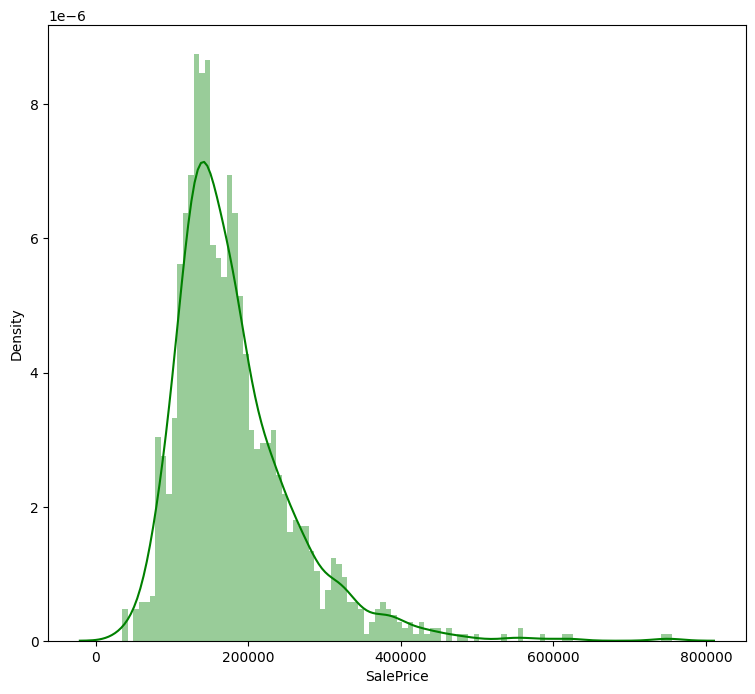

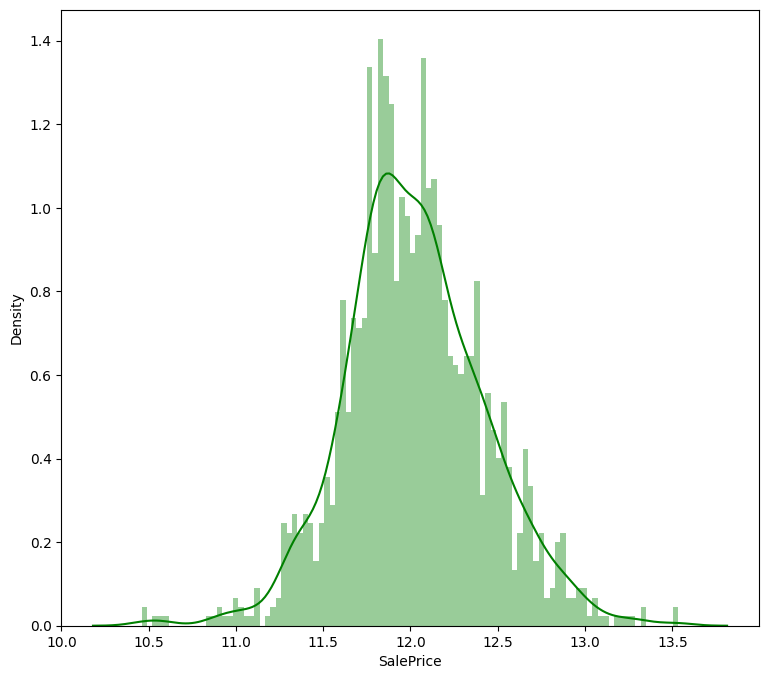

In [8]:
print(Y.describe())
plt.figure(figsize=(9, 8))
sns.distplot(Y, color='g', bins=100, hist_kws={'alpha': 0.4});
plt.figure(figsize=(9, 8))
sns.distplot(np.log(Y), color='g', bins=100, hist_kws={'alpha': 0.4});

## Numerical data distribution

We will now take a look at how the numerical features are distributed. In order to do this, let us first list all the types of data from our dataset and select only the numerical ones.

In [9]:
list(set(dataset_df.dtypes.tolist()))

[dtype('O'), dtype('float64'), dtype('int64')]

In [10]:
df_num = dataset_df.select_dtypes(include = ['float64', 'int64'])
df_obj = dataset_df.select_dtypes(include = ['O'])
df_num.head()
df_obj.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [11]:
print(df_obj.nunique())

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64


In [12]:
df_obj = df_obj.astype('category')

In [13]:
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSZoning       1460 non-null   category
 1   Street         1460 non-null   category
 2   Alley          91 non-null     category
 3   LotShape       1460 non-null   category
 4   LandContour    1460 non-null   category
 5   Utilities      1460 non-null   category
 6   LotConfig      1460 non-null   category
 7   LandSlope      1460 non-null   category
 8   Neighborhood   1460 non-null   category
 9   Condition1     1460 non-null   category
 10  Condition2     1460 non-null   category
 11  BldgType       1460 non-null   category
 12  HouseStyle     1460 non-null   category
 13  RoofStyle      1460 non-null   category
 14  RoofMatl       1460 non-null   category
 15  Exterior1st    1460 non-null   category
 16  Exterior2nd    1460 non-null   category
 17  MasVnrType     1452 non-null   ca

In [14]:
nan_counts = df_num.isna().sum()
nan_counts

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [15]:
nan_counts = df_obj.isna().sum()
nan_counts

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [16]:
df_cat_filled = df_obj.copy()
new_category = 'Missing'

# Replace NaN values with the new category
for col in df_cat_filled.columns:
  df_cat_filled[col] = df_obj[col].cat.add_categories(new_category).fillna(new_category)

In [17]:
df_cat_filled.head(3)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
1,RL,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
2,RL,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal


Now let us plot the distribution for all the numerical features.

In [18]:
df_num_mean = df_num.fillna(df_num.mean())

In [19]:
nan_counts = df_num_mean.isna().sum()
nan_counts

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [20]:
df_cat_filled.head(3)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
1,RL,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
2,RL,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal


In [21]:
new_df = pd.concat([df_cat_filled,df_num_mean],axis=1)
new_df.head(3)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,548,0,61,0,0,0,0,0,2,2008
1,RL,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,460,298,0,0,0,0,0,0,5,2007
2,RL,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,608,0,42,0,0,0,0,0,9,2008


In [22]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSZoning       1460 non-null   category
 1   Street         1460 non-null   category
 2   Alley          1460 non-null   category
 3   LotShape       1460 non-null   category
 4   LandContour    1460 non-null   category
 5   Utilities      1460 non-null   category
 6   LotConfig      1460 non-null   category
 7   LandSlope      1460 non-null   category
 8   Neighborhood   1460 non-null   category
 9   Condition1     1460 non-null   category
 10  Condition2     1460 non-null   category
 11  BldgType       1460 non-null   category
 12  HouseStyle     1460 non-null   category
 13  RoofStyle      1460 non-null   category
 14  RoofMatl       1460 non-null   category
 15  Exterior1st    1460 non-null   category
 16  Exterior2nd    1460 non-null   category
 17  MasVnrType     1460 non-null   ca

In [23]:
nan_counts = new_df.isna().sum()
nan_counts

MSZoning       0
Street         0
Alley          0
LotShape       0
LandContour    0
              ..
ScreenPorch    0
PoolArea       0
MiscVal        0
MoSold         0
YrSold         0
Length: 79, dtype: int64

In [24]:
import numpy as np
Y = np.log(Y)

In [25]:
logscale=['YearBuilt', 'MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

In [26]:
new_df[logscale] = np.log(new_df[logscale]+1)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_df_sc = new_df.copy()
print(new_df.head(3))
#new_df_sc.drop('SalePrice', axis=1)
new_df_sc[df_num.columns] = scaler.fit_transform(new_df_sc[df_num.columns])
#new_df_sc['SalePrice'] = new_df['SalePrice']

  MSZoning Street    Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave  Missing      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave  Missing      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave  Missing      IR1         Lvl    AllPub    Inside       Gtl   

  Neighborhood Condition1  ... GarageArea WoodDeckSF OpenPorchSF  \
0      CollgCr       Norm  ...   6.308098   0.000000    4.127134   
1      Veenker      Feedr  ...   6.133398   5.700444    0.000000   
2      CollgCr       Norm  ...   6.411818   0.000000    3.761200   

  EnclosedPorch 3SsnPorch ScreenPorch PoolArea MiscVal MoSold YrSold  
0           0.0       0.0         0.0      0.0     0.0      2   2008  
1           0.0       0.0         0.0      0.0     0.0      5   2007  
2           0.0       0.0         0.0      0.0     0.0      9   2008  

[3 rows x 79 columns]


In [28]:
#new_df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [29]:
#new_df_sc.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for col in df_obj.columns:
  new_df_sc[col] = label_encoder.fit_transform(new_df_sc[col])
X_train,X_test,y_train,y_test = train_test_split(new_df_sc, Y,test_size=0.2)

In [31]:
X_train.head(3)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
44,3,1,1,3,3,0,4,0,12,2,...,-0.069465,-0.946701,-1.072916,-0.404244,-0.128521,-0.292769,-0.069393,-0.190481,-0.489110,-1.367655
1075,3,1,1,3,3,0,4,0,6,2,...,-0.222298,-0.946701,-1.072916,-0.404244,-0.128521,-0.292769,-0.069393,-0.190481,0.250891,-0.614439
507,1,1,1,0,3,0,4,0,21,2,...,0.487767,-0.946701,1.081118,-0.404244,-0.128521,-0.292769,-0.069393,-0.190481,0.990891,0.891994


In [32]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()
LR_model.fit(X_train,y_train)

LinearRegression()

In [33]:
from sklearn.metrics import mean_squared_error
test_predicted = LR_model.predict(X_test)
train_predicted = LR_model.predict(X_train)

In [34]:
rmse_test = np.sqrt(mean_squared_error(y_test, test_predicted))
rmse_train = np.sqrt(mean_squared_error(y_train, train_predicted))

In [35]:
print('rmse_test is',rmse_test,'rmse_train is',rmse_train)

rmse_test is 0.17068974728476974 rmse_train is 0.11487333830977142


In [36]:
test_file_path = "/content/test.csv"
test_data = pd.read_csv(test_file_path)
ids = test_data.pop('Id')
#dataset_df_test = test_data.drop('Id', axis=1)
# test_dl =

# preds = rf.predict(test_ds)
# output = pd.DataFrame({'Id': ids,
#                        'SalePrice': preds.squeeze()})

test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [37]:
dataset_df_test = test_data.copy()

In [38]:
df_num_test = dataset_df_test.select_dtypes(include = ['float64', 'int64'])
df_obj_test = dataset_df_test.select_dtypes(include = ['O'])
df_num_test.head()
df_obj_test.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [39]:
df_obj_test = df_obj_test.astype('category')

In [40]:
df_cat_filled_test = df_obj_test.copy()
new_category = 'Missing'

# Replace NaN values with the new category
for col in df_cat_filled_test.columns:
  df_cat_filled_test[col] = df_obj_test[col].cat.add_categories(new_category).fillna(new_category)

In [41]:
df_num_mean_test = df_num_test.fillna(df_num.mean())

In [42]:
new_df_test = pd.concat([df_cat_filled_test,df_num_mean_test],axis=1)
new_df_test.head(3)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,RH,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,730.0,140,0,0,0,120,0,0,6,2010
1,RL,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,312.0,393,36,0,0,0,0,12500,6,2010
2,RL,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,482.0,212,34,0,0,0,0,0,3,2010


In [43]:
scaler.n_features_in_

36

In [44]:
new_df_test[logscale] = np.log(new_df_test[logscale]+1)

In [45]:
new_df_sc_test = new_df_test.copy()
new_df_sc_test[df_num_test.columns] = scaler.transform(new_df_sc_test[df_num_test.columns])
#new_df_sc['SalePrice'] = new_df['SalePrice']

In [46]:
for col in df_obj_test.columns:
  new_df_sc_test[col] = label_encoder.fit_transform(new_df_sc_test[col])

In [47]:
test_predicted = LR_model.predict(new_df_sc_test)

In [48]:
test_predicted
sub = np.exp(test_predicted)
sub

array([116580.14043411, 162060.45444137, 172176.04093586, ...,
       168170.0391393 , 120501.33062885, 234087.29286088])

In [49]:
output = pd.DataFrame({'Id': ids,'SalePrice': sub.squeeze()})
output

,Id,SalePrice
0,1461,116580.140434
1,1462,162060.454441
2,1463,172176.040936
3,1464,194778.759647
4,1465,188718.005326
...,...,...
1454,2915,92327.078862
1455,2916,87610.097885
1456,2917,168170.039139
1457,2918,120501.330629


In [50]:
output.to_csv('submission1.csv', index=False)

In [51]:
sample_submission_df = pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')
sample_submission_df['SalePrice'] = rf.predict(test_ds)
sample_submission_df.to_csv('/kaggle/working/submission.csv', index=False)
sample_submission_df.head()

FileNotFoundError: [Errno 2] No such file or directory: '../input/house-prices-advanced-regression-techniques/sample_submission.csv'